In [1]:
# Import the module
from arles.visuals import *

# Verify event configuration
print("Events configured:")
for i, event in enumerate(EVENTS):
    print(f"  E{i+1}: {event['name']} on {event['date']}")

print(f"\nAnalysis window: ±{EVENT_WINDOW_DAYS} days")
print(f"Filters: confidence ≥ {CONFIDENCE_THRESHOLD}, sum(archetypes) ≥ {ARCHETYPE_SUM_THRESHOLD}")

Events configured:
  E1: X/Twitter ban in Brazil on 2024-08-30
  E2: X/Twitter changing on 2024-10-17
  E3: U.S. election (Trump) on 2024-11-05
  E4: Social platforms changings on 2025-01-06

Analysis window: ±7 days
Filters: confidence ≥ 0.5, sum(archetypes) ≥ 0.3


In [14]:
pd.read_csv("data/bluesky_sampled_clean_small.csv")

,action_id,created_at,author_user_id,target_user_id,original_action_id,activity_type,text,langs,tags,links,media
0,at://did:plc:n5tgqghvsmedkapljlpsquj7/app.bsky...,2024-08-23 00:00:00+00:00,n5tgqghvsmedkapljlpsquj7,NaN,NaN,post,NaN,NaN,[],['https://www.betoissues.com/notes/ssh-x-forwa...,[]
1,at://did:plc:7o7g2n54gzuzhhpqwk226wcn/app.bsky...,2024-08-23 00:00:26.407000+00:00,7o7g2n54gzuzhhpqwk226wcn,7o7g2n54gzuzhhpqwk226wcn,at://did:plc:7o7g2n54gzuzhhpqwk226wcn/app.bsky...,quote,LIVE 🔴,['en'],[],[],[]
2,at://did:plc:t5taxt7lhgyu25oq5nevakqd/app.bsky...,2024-08-23 00:01:02.076000+00:00,t5taxt7lhgyu25oq5nevakqd,vlpy6zuqqum5tumv7b6dw5fp,at://did:plc:vlpy6zuqqum5tumv7b6dw5fp/app.bsky...,repost,NaN,NaN,[],[],[]
3,at://did:plc:nqv23cjesrasi2bpvyxm4kyy/app.bsky...,2024-08-23 00:02:15.055000+00:00,nqv23cjesrasi2bpvyxm4kyy,lg2is3bh2qsvpcnou4uia3x2,at://did:plc:lg2is3bh2qsvpcnou4uia3x2/app.bsky...,reply,"Yes, it does wonders. The pen forces me to slo...",['en'],[],[],[]
4,at://did:plc:hyiiur67zmdxhlakozfefpbh/app.bsky...,2024-08-23 00:02:38.528000+00:00,hyiiur67zmdxhlakozfefpbh,4usmserhjqkvhldgedfjb3jw,at://did:plc:4usmserhjqkvhldgedfjb3jw/app.bsky...,reply,That would be redundant.,['en'],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
3363799,at://did:plc:js5fijxhas6mrpcw3hzcsao2/app.bsky...,2025-01-27 23:59:12.621000+00:00,675vt3dlxhtg3pfslrgvsu5t,js5fijxhas6mrpcw3hzcsao2,NaN,follow,NaN,NaN,[],[],[]
3363800,at://did:plc:3cppy6ww6gkqesvmnykr5hln/app.bsky...,2025-01-27 23:59:17.454000+00:00,3cppy6ww6gkqesvmnykr5hln,lko7zoni57x6grldl77ws5eb,at://did:plc:lko7zoni57x6grldl77ws5eb/app.bsky...,reply,The internet lives for ever,['en'],[],[],[]
3363801,at://did:plc:duv3vsqmct6z2uxxt3v6y6jj/app.bsky...,2025-01-27 23:59:17.488000+00:00,v4x7suzellqc2o5fl6bai2f3,duv3vsqmct6z2uxxt3v6y6jj,NaN,follow,NaN,NaN,[],[],[]
3363802,at://did:plc:duv3vsqmct6z2uxxt3v6y6jj/app.bsky...,2025-01-27 23:59:17.488000+00:00,qyu6gdpu64lx7oce7lyvrpbx,duv3vsqmct6z2uxxt3v6y6jj,NaN,follow,NaN,NaN,[],[],[]


In [2]:
DATA_PATH = "data/bluesky_sampled_clean_small.csv" # "data/bluesky_sampled_clean_full_sorted.csv" # 

In [3]:
from arles.arles import ArchetypeLearner

# Load and process whole period
learner_whole = ArchetypeLearner()
learner_whole.process_csv_stream(DATA_PATH, show_progress=True)

archetypes_whole = learner_whole.get_archetypes()
print(f"\nWhole period: {learner_whole.get_stats()}")

# Convert to DataFrame
df_whole = prepare_dataframe(archetypes_whole)
df_whole_filtered = filter_users(df_whole)

print(f"\nFiltered users: {len(df_whole_filtered)}/{len(df_whole)} ({100*len(df_whole_filtered)/len(df_whole):.1f}%)")

Processing CSV: 100%|█████████████████████████████████████████████████████| 3363804/3363804 [14:08<00:00, 3964.98 actions/s]



Whole period: {'total_actions_processed': 3363804, 'total_users': 1557835, 'total_posts_tracked': 436266, 'array_capacity': 2048000, 'memory_efficiency': '1557835/2048000 (76.1%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}
Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 1557835
  High confidence: 1554689 (99.8%)
  Active archetypes: 199000 (12.8%)
  Final filtered: 199000 (12.8%)

Filtered users: 199000/1557835 (12.8%)


Saved: figures/figure1_archetype_overview.pdf


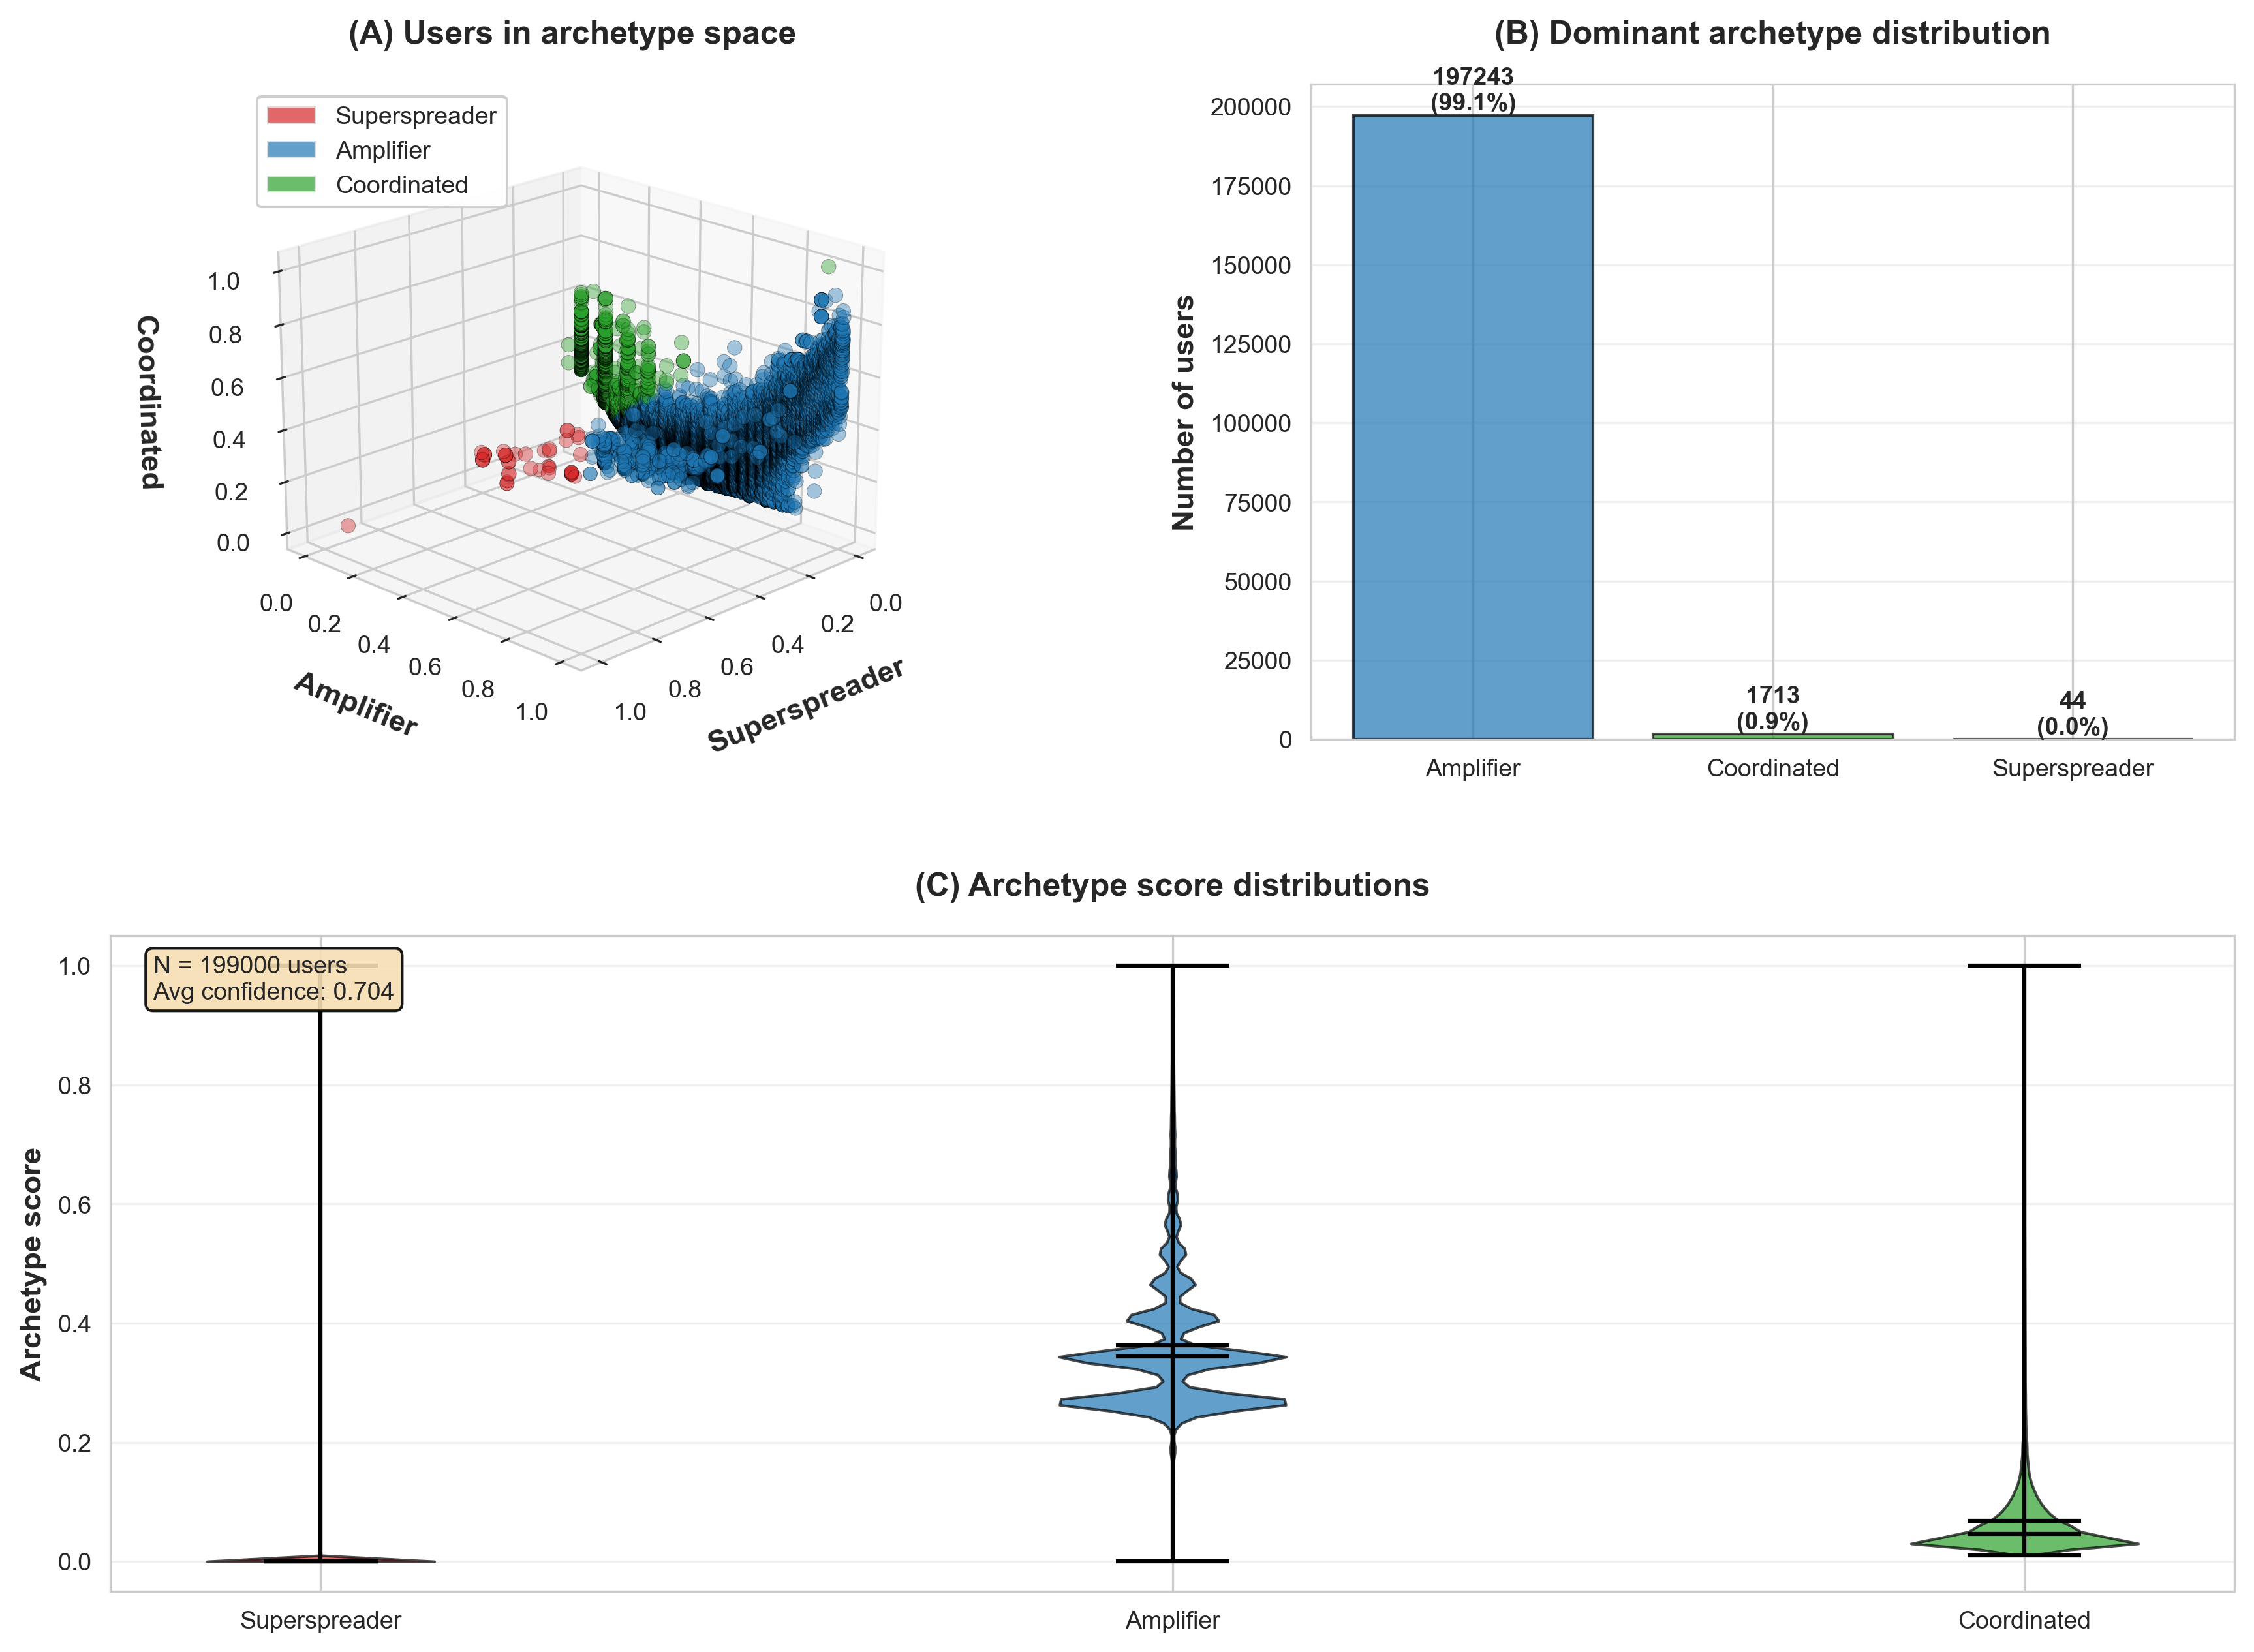


Archetype Distribution:
dominant_archetype
amplifier        197243
coordinated        1713
superspreader        44
Name: count, dtype: int64

Descriptive Statistics:
       superspreader      amplifier    coordinated     confidence
count  199000.000000  199000.000000  199000.000000  199000.000000
mean        0.000282       0.362357       0.068106       0.703905
std         0.006802       0.122267       0.071164       0.050774
min         0.000000       0.000000       0.009858       0.527572
25%         0.000020       0.270953       0.031295       0.660903
50%         0.000020       0.343841       0.046323       0.693846
75%         0.000020       0.409441       0.075682       0.733456
max         1.000000       1.000000       1.000000       0.800065


In [4]:
# Create overview figure for whole period
fig1 = plot_archetype_overview(
    df_whole_filtered, 
    save_path='figures/figure1_archetype_overview.pdf',
    show_plot=True
)

# Optional: Generate summary statistics table
print("\nArchetype Distribution:")
print(df_whole_filtered['dominant_archetype'].value_counts())
print("\nDescriptive Statistics:")
print(df_whole_filtered[['superspreader', 'amplifier', 'coordinated', 'confidence']].describe())

In [5]:
import os
import pandas as pd
from tqdm import tqdm

# Utility: ensure subfolder exists
SUBPERIODS_DIR = "data/subperiods"
os.makedirs(SUBPERIODS_DIR, exist_ok=True)

# Utility: filter main dataset by date window and save to file if not exists
def get_or_create_period_csv(event_idx, phase, start_date, end_date, source_path="data/bluesky_data.csv", chunksize=100_000):
    """
    Stream-filter the main dataset by date window and save as subperiod CSV.
    Returns the path to the subperiod file.
    """
    output_path = os.path.join(SUBPERIODS_DIR, f"bluesky_event{event_idx}_{phase}.csv")
    
    if os.path.exists(output_path):
        print(f"✓ Using existing file {output_path}")
        return output_path
    
    print(f"→ Creating {output_path} for {phase} period ({start_date.date()} to {end_date.date()})")
    
    # Prepare writing
    total_rows = 0
    first_chunk = True
    
    # Read and filter in chunks
    for chunk in tqdm(
        pd.read_csv(source_path, chunksize=chunksize),
        desc=f"Filtering {phase} period",
        unit=" chunk"
    ):
        # Force datetime conversion safely, handling timezone info if present
        chunk["created_at"] = pd.to_datetime(chunk["created_at"], errors="coerce", utc=True)
        
        # Drop any rows where conversion failed (rare but possible)
        chunk = chunk.dropna(subset=["created_at"])
        
        # Filter by date range
        mask = (chunk["created_at"] >= pd.Timestamp(start_date, tz="UTC")) & \
               (chunk["created_at"] <= pd.Timestamp(end_date, tz="UTC"))
        filtered = chunk.loc[mask]
        
        if not filtered.empty:
            filtered.to_csv(output_path, mode="w" if first_chunk else "a", header=first_chunk, index=False)
            first_chunk = False
            total_rows += len(filtered)

    print(f"  → Done. {total_rows} rows written.\n")

    return output_path

In [6]:
from datetime import datetime, timedelta

# Helper function to get date ranges
def get_event_windows(event_date_str, window_days=EVENT_WINDOW_DAYS):
    """
    Returns (before_start, before_end, during_start, during_end, after_start, after_end)
    """
    event_date = datetime.strptime(event_date_str, '%Y-%m-%d')
    
    before_start = event_date - timedelta(days=2*window_days)
    before_end = event_date - timedelta(days=window_days)
    
    during_start = event_date - timedelta(days=window_days)
    during_end = event_date + timedelta(days=window_days)
    
    after_start = event_date + timedelta(days=window_days)
    after_end = event_date + timedelta(days=2*window_days)
    
    return (before_start, before_end, during_start, during_end, after_start, after_end)

# Process each event
learner_results = {'whole_period': archetypes_whole}

for i, event in enumerate(EVENTS):

    print(f"\n{'='*60}")
    print(f"Processing Event {i+1}: {event['name']}")
    print(f"{'='*60}")

    windows = get_event_windows(event['date'])

    for phase_idx, phase in enumerate(['before', 'during', 'after']):
        # Get date range
        start_date = windows[phase_idx*2]
        end_date = windows[phase_idx*2 + 1]

        print(f"\n{phase.capitalize()}: {start_date.date()} to {end_date.date()}")

        # Filter or load CSV for this phase
        csv_path = get_or_create_period_csv(
            source_path=DATA_PATH,
            event_idx=i+1,
            phase=phase,
            start_date=start_date,
            end_date=end_date
        )

        # Process the filtered CSV
        learner_period = ArchetypeLearner()
        learner_period.process_csv_stream(csv_path, show_progress=True)

        # Get archetypal vectors
        archetypes_period = learner_period.get_archetypes()
        learner_results[f'event_{i+1}_{phase}'] = archetypes_period

        print(f"  Users: {len(archetypes_period)}")
        print(f"  Stats: {learner_period.get_stats()}")

print("\n✓ All periods processed!")


Processing Event 1: X/Twitter ban in Brazil

Before: 2024-08-16 to 2024-08-23
✓ Using existing file data/subperiods/bluesky_event1_before.csv


Processing CSV: 100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7810.62 actions/s]

  Users: 2
  Stats: {'total_actions_processed': 2, 'total_users': 2, 'total_posts_tracked': 0, 'array_capacity': 1000, 'memory_efficiency': '2/1000 (0.2%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

During: 2024-08-23 to 2024-09-06
✓ Using existing file data/subperiods/bluesky_event1_during.csv



Processing CSV: 100%|███████████████████████████████████████████████████████| 910460/910460 [02:41<00:00, 5641.01 actions/s]


  Users: 434213
  Stats: {'total_actions_processed': 910460, 'total_users': 434213, 'total_posts_tracked': 57789, 'array_capacity': 512000, 'memory_efficiency': '434213/512000 (84.8%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

After: 2024-09-06 to 2024-09-13
✓ Using existing file data/subperiods/bluesky_event1_after.csv


Processing CSV: 100%|███████████████████████████████████████████████████████| 664292/664292 [02:57<00:00, 3746.09 actions/s]


  Users: 373978
  Stats: {'total_actions_processed': 664292, 'total_users': 373978, 'total_posts_tracked': 68122, 'array_capacity': 512000, 'memory_efficiency': '373978/512000 (73.0%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

Processing Event 2: X/Twitter changing

Before: 2024-10-03 to 2024-10-10
✓ Using existing file data/subperiods/bluesky_event2_before.csv


Processing CSV: 100%|███████████████████████████████████████████████████████| 292400/292400 [01:38<00:00, 2957.72 actions/s]


  Users: 192244
  Stats: {'total_actions_processed': 292400, 'total_users': 192244, 'total_posts_tracked': 46657, 'array_capacity': 256000, 'memory_efficiency': '192244/256000 (75.1%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

During: 2024-10-10 to 2024-10-24
✓ Using existing file data/subperiods/bluesky_event2_during.csv


Processing CSV: 100%|█████████████████████████████████████████████████████| 1096400/1096400 [04:57<00:00, 3687.64 actions/s]


  Users: 539474
  Stats: {'total_actions_processed': 1096400, 'total_users': 539474, 'total_posts_tracked': 150688, 'array_capacity': 1024000, 'memory_efficiency': '539474/1024000 (52.7%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

After: 2024-10-24 to 2024-10-31
✓ Using existing file data/subperiods/bluesky_event2_after.csv


Processing CSV: 100%|████████████████████████████████████████████████████████| 476593/476593 [16:31<00:00, 480.44 actions/s]


  Users: 283905
  Stats: {'total_actions_processed': 476593, 'total_users': 283905, 'total_posts_tracked': 90463, 'array_capacity': 512000, 'memory_efficiency': '283905/512000 (55.5%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

Processing Event 3: U.S. election (Trump)

Before: 2024-10-22 to 2024-10-29
✓ Using existing file data/subperiods/bluesky_event3_before.csv


Processing CSV: 100%|███████████████████████████████████████████████████████| 535820/535820 [02:41<00:00, 3324.17 actions/s]


  Users: 312910
  Stats: {'total_actions_processed': 535820, 'total_users': 312910, 'total_posts_tracked': 95364, 'array_capacity': 512000, 'memory_efficiency': '312910/512000 (61.1%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

During: 2024-10-29 to 2024-11-12
✓ Using existing file data/subperiods/bluesky_event3_during.csv


Processing CSV: 100%|█████████████████████████████████████████████████████| 1095267/1095267 [05:06<00:00, 3576.17 actions/s]


  Users: 501528
  Stats: {'total_actions_processed': 1095267, 'total_users': 501528, 'total_posts_tracked': 159569, 'array_capacity': 512000, 'memory_efficiency': '501528/512000 (98.0%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

After: 2024-11-12 to 2024-11-19
✓ Using existing file data/subperiods/bluesky_event3_after.csv


Processing CSV: 100%|█████████████████████████████████████████████████████| 1114823/1114823 [02:42<00:00, 6840.32 actions/s]


  Users: 508317
  Stats: {'total_actions_processed': 1114823, 'total_users': 508317, 'total_posts_tracked': 76931, 'array_capacity': 512000, 'memory_efficiency': '508317/512000 (99.3%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

Processing Event 4: Social platforms changings

Before: 2024-12-23 to 2024-12-30
✓ Using existing file data/subperiods/bluesky_event4_before.csv


Processing CSV: 100%|███████████████████████████████████████████████████████| 839309/839309 [03:06<00:00, 4512.28 actions/s]


  Users: 443733
  Stats: {'total_actions_processed': 839309, 'total_users': 443733, 'total_posts_tracked': 96468, 'array_capacity': 512000, 'memory_efficiency': '443733/512000 (86.7%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

During: 2024-12-30 to 2025-01-13
✓ Using existing file data/subperiods/bluesky_event4_during.csv


Processing CSV: 100%|█████████████████████████████████████████████████████| 1876706/1876706 [06:38<00:00, 4707.93 actions/s]


  Users: 865384
  Stats: {'total_actions_processed': 1876706, 'total_users': 865384, 'total_posts_tracked': 191230, 'array_capacity': 1024000, 'memory_efficiency': '865384/1024000 (84.5%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

After: 2025-01-13 to 2025-01-20
✓ Using existing file data/subperiods/bluesky_event4_after.csv


Processing CSV: 100%|███████████████████████████████████████████████████████| 912512/912512 [03:11<00:00, 4762.35 actions/s]


  Users: 522974
  Stats: {'total_actions_processed': 912512, 'total_users': 522974, 'total_posts_tracked': 102151, 'array_capacity': 1024000, 'memory_efficiency': '522974/1024000 (51.1%)', 'superspreader_metrics': ['avg_reshares_per_post', 'posting_frequency', 'virality_score', 'tash_index'], 'amplifier_metrics': ['repost_count', 'repost_frequency', 'weighted_repost_position', 'cascade_amplification', 'diverse_content_amplification'], 'coordinated_metrics': ['co_repost_count', 'max_user_similarity', 'temporal_burstiness', 'synchronized_activity', 'bot_like_behavior']}

✓ All periods processed!


In [7]:
# Compute statistics for all periods
stats_df = analyze_event_windows(learner_results, events=EVENTS)

# Display summary
print("Event Window Statistics:")
print(stats_df[['period', 'n_users', 'superspreader', 'amplifier', 'coordinated']].to_string())

# Save to CSV for LaTeX table
stats_df.to_csv('results/event_statistics.csv', index=False)
print("\n✓ Statistics saved to results/event_statistics.csv")

Event Window Statistics:
                                 period  n_users                                                                                                                                                                                superspreader                                                                                                                                                                    amplifier                                                                                                                                                                    coordinated
0                          Whole period   199000  {'mean': 0.0002815738852832373, 'median': 2.0095700165256858e-05, 'std': 0.006802436390120833, 'q25': 2.0095700165256858e-05, 'q75': 2.0095700165256858e-05, 'q90': 2.0095700165256858e-05}      {'mean': 0.3623573067571462, 'median': 0.34384089708328247, 'std': 0.12226698667881501, 'q25': 0.2709534466266632, 'q75': 0.409441202878952, 'q90'

Saved: figures/figure2_event_comparison.pdf


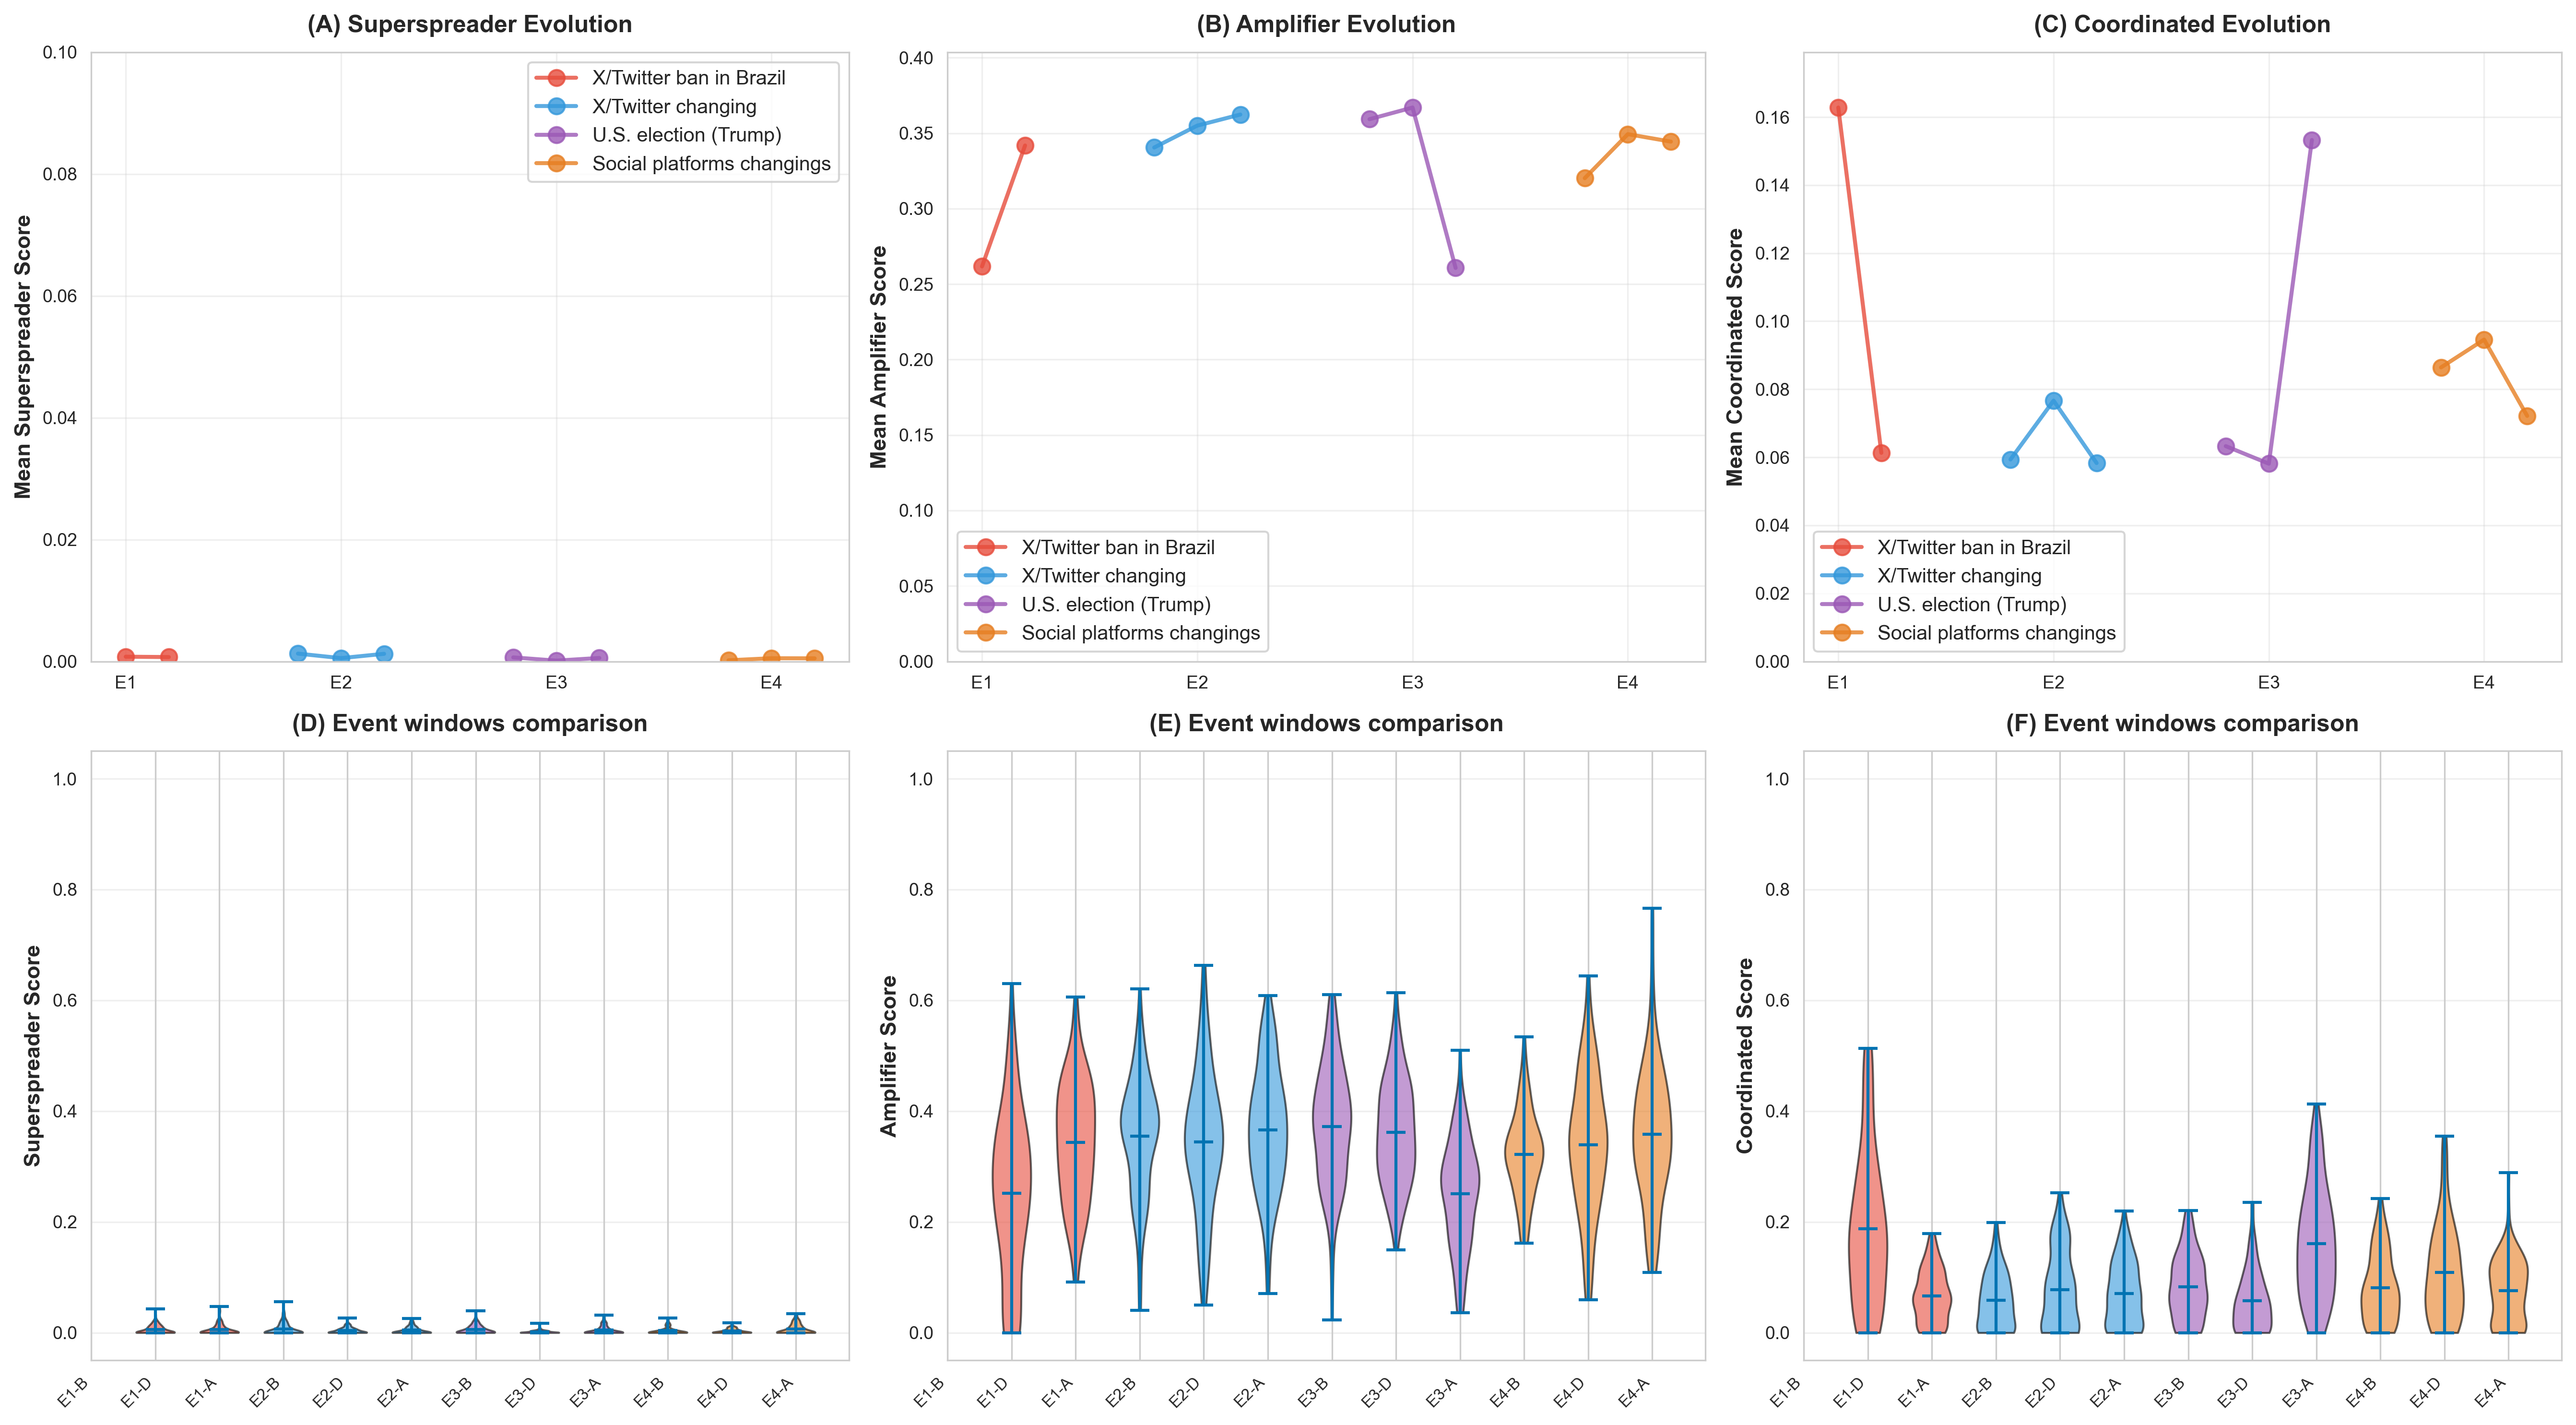


✓ Figure 2 generated!


In [8]:
# Create event comparison figure
fig2 = plot_event_comparison(
    stats_df,
    events=EVENTS,
    save_path='figures/figure2_event_comparison.pdf',
    show_plot=True
)

print("\n✓ Figure 2 generated!")

In [9]:
# Compare specific periods of interest
print("Statistical Comparisons:\n")

# Example 1: Event 1 - Before vs During
df_e1_before = prepare_dataframe(learner_results['event_1_before'])
df_e1_during = prepare_dataframe(learner_results['event_1_during'])

df_e1_before_filt = filter_users(df_e1_before)
df_e1_during_filt = filter_users(df_e1_during)

test_results_e1 = compare_periods_statistically(
    df_e1_before_filt, df_e1_during_filt,
    "Before E1 (X/Twitter ban)", "During E1"
)

print("Event 1: Before vs During")
print(test_results_e1.to_string(index=False))
print()

# Example 2: Event 2 - Before vs After (reopening effect)
df_e2_before = prepare_dataframe(learner_results['event_2_before'])
df_e2_after = prepare_dataframe(learner_results['event_2_after'])

df_e2_before_filt = filter_users(df_e2_before)
df_e2_after_filt = filter_users(df_e2_after)

test_results_e2 = compare_periods_statistically(
    df_e2_before_filt, df_e2_after_filt,
    "Before E2 (X/Twitter changes)", "After E2"
)

print("Event 2: Before vs After")
print(test_results_e2.to_string(index=False))

# Save all test results
all_tests = []
for i in range(1, 5):
    for comparison in [('before', 'during'), ('during', 'after'), ('before', 'after')]:
        try:
            df1 = filter_users(prepare_dataframe(learner_results[f'event_{i}_{comparison[0]}']))
            df2 = filter_users(prepare_dataframe(learner_results[f'event_{i}_{comparison[1]}']))
            
            tests = compare_periods_statistically(
                df1, df2,
                f"E{i} {comparison[0]}", f"E{i} {comparison[1]}"
            )
            tests['event_id'] = i
            all_tests.append(tests)
        except KeyError:
            continue

all_tests_df = pd.concat(all_tests, ignore_index=True)
all_tests_df.to_csv('results/statistical_tests.csv', index=False)
print("\n✓ All tests saved to results/statistical_tests.csv")

Statistical Comparisons:

Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 2
  High confidence: 0 (0.0%)
  Active archetypes: 2 (100.0%)
  Final filtered: 0 (0.0%)
Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 434213
  High confidence: 430955 (99.2%)
  Active archetypes: 39782 (9.2%)
  Final filtered: 39782 (9.2%)
Event 1: Before vs During
    archetype                   period1   period2  mean1    mean2  mean_diff  cohens_d  p_value  significant interpretation
superspreader Before E1 (X/Twitter ban) During E1    NaN 0.000775        NaN       0.0      NaN        False     negligible
    amplifier Before E1 (X/Twitter ban) During E1    NaN 0.261704        NaN       0.0      NaN        False     negligible
  coordinated Before E1 (X/Twitter ban) During E1    NaN 0.162806        NaN       0.0      NaN        False     negligible

Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 192244
  High confidence: 187281 (97.4%)
  Active archetypes: 16

Shift Magnitude Analysis:

- Event 1: X Ban in Brazil

Common users between periods: 0

- Event 2: X/Twitter changing policies

Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 539474
  High confidence: 535295 (99.2%)
  Active archetypes: 71511 (13.3%)
  Final filtered: 71511 (13.3%)
Common users between periods: 2789
Saved: figures/shift_magnitude_e2.pdf


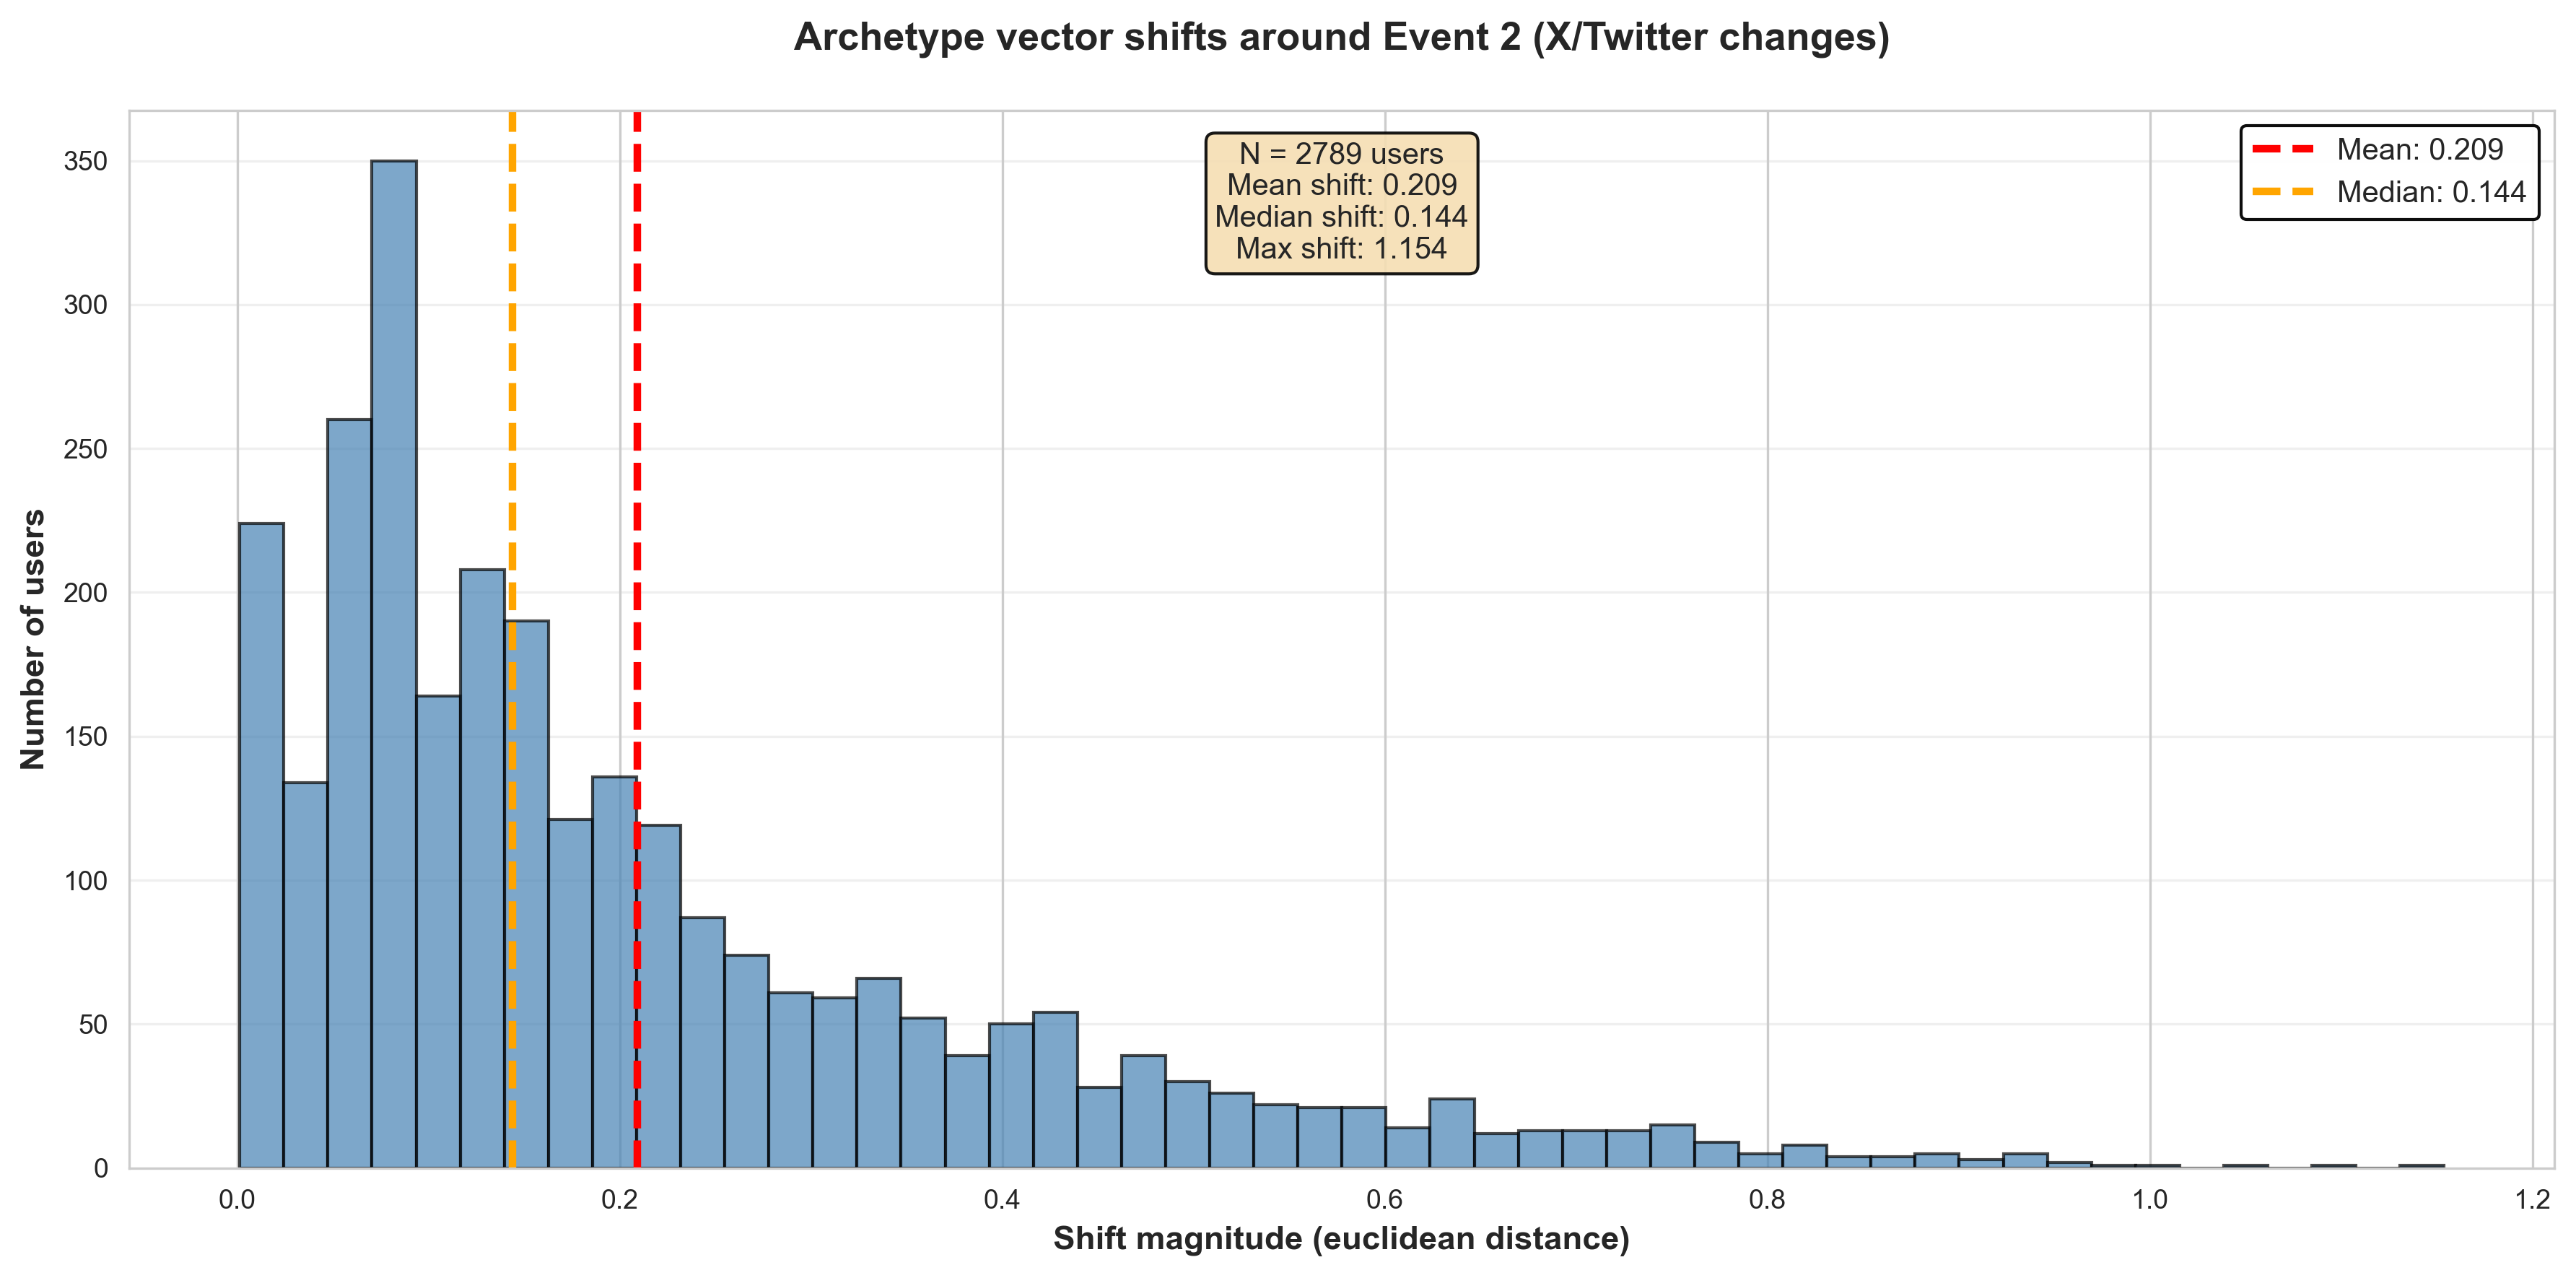


- Event 3: US Election

Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 312910
  High confidence: 308223 (98.5%)
  Active archetypes: 24985 (8.0%)
  Final filtered: 24984 (8.0%)
Filtering: confidence ≥ 0.5, archetype sum ≥ 0.3
  Total users: 501528
  High confidence: 497805 (99.3%)
  Active archetypes: 73004 (14.6%)
  Final filtered: 73004 (14.6%)
Common users between periods: 6489
Saved: figures/shift_magnitude_e3.pdf


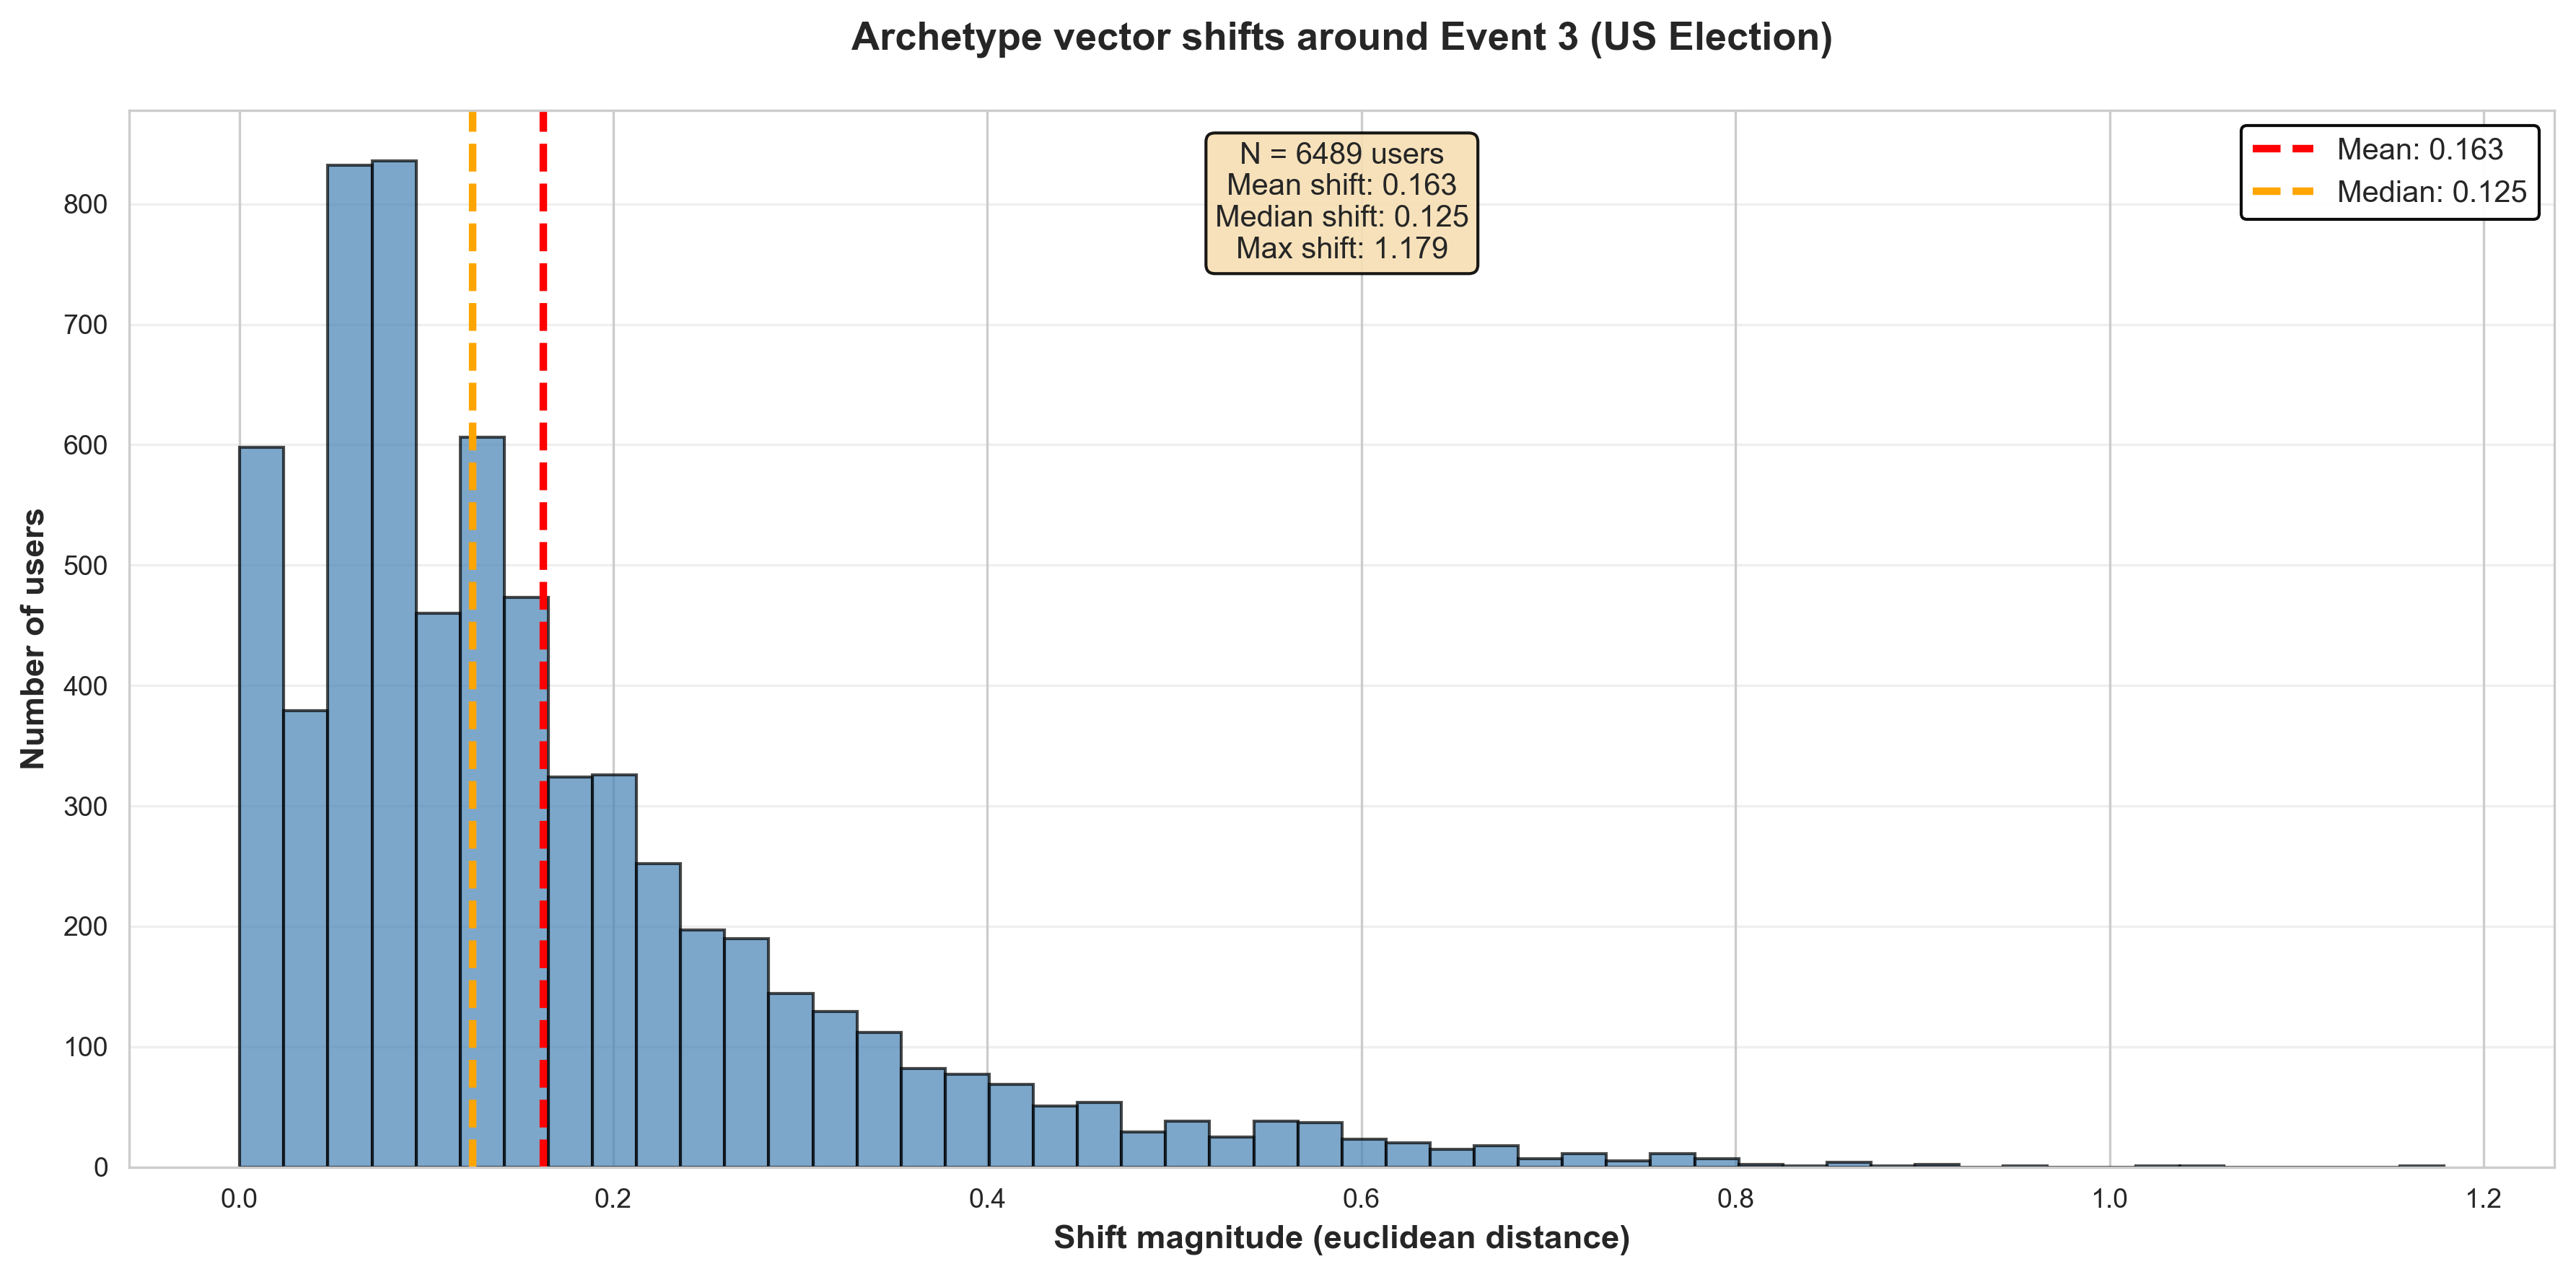


✓ Shift magnitude figures generated!


In [10]:
# Analyze how much users change around key events
print("Shift Magnitude Analysis:\n")

# Event 1: X Ban in Brazil (expect large shifts)
print("- Event 1: X Ban in Brazil\n")
fig_shift_e1 = plot_shift_magnitude(
    df_e1_before_filt, df_e1_during_filt,
    event_name="Event 1 (X/Twitter ban)",
    save_path='figures/shift_magnitude_e1.pdf'
)

# Event 2: X/Twitter changing policies
print("\n- Event 2: X/Twitter changing policies\n")
df_e2_during = filter_users(prepare_dataframe(learner_results['event_2_during']))
fig_shift_e2 = plot_shift_magnitude(
    df_e2_before_filt, df_e2_during,
    event_name="Event 2 (X/Twitter changes)",
    save_path='figures/shift_magnitude_e2.pdf'
)

# Event 3: US Election
print("\n- Event 3: US Election\n")
df_e3_before = filter_users(prepare_dataframe(learner_results['event_3_before']))
df_e3_during = filter_users(prepare_dataframe(learner_results['event_3_during']))
fig_shift_e3 = plot_shift_magnitude(
    df_e3_before, df_e3_during,
    event_name="Event 3 (US Election)",
    save_path='figures/shift_magnitude_e3.pdf'
)

print("\n✓ Shift magnitude figures generated!")

In [11]:
# Identify top users per archetype for qualitative inspection
print("Top Users by Archetype:\n")

for archetype in ['superspreader', 'amplifier', 'coordinated']:
    print(f"\n{archetype.upper()}:")
    print("="*60)
    
    top_users = df_whole_filtered.nlargest(10, archetype)
    
    for rank, (idx, row) in enumerate(top_users.iterrows(), 1):
        print(f"  {rank}. User {row['user_id'][:20]:20s} | "
              f"Score: {row[archetype]:.3f} | "
              f"Conf: {row['confidence']:.3f} | "
              f"SS:{row['superspreader']:.2f} "
              f"Amp:{row['amplifier']:.2f} "
              f"Coord:{row['coordinated']:.2f}")

# Export for manual inspection
top_users_all = pd.concat([
    df_whole_filtered.nlargest(20, 'superspreader').assign(top_archetype='superspreader'),
    df_whole_filtered.nlargest(20, 'amplifier').assign(top_archetype='amplifier'),
    df_whole_filtered.nlargest(20, 'coordinated').assign(top_archetype='coordinated'),
])
top_users_all.to_csv('results/top_users_inspection.csv', index=False)
print("\n✓ Top users exported to results/top_users_inspection.csv")

Top Users by Archetype:


SUPERSPREADER:
  1. User lko7zoni57x6grldl77w | Score: 1.000 | Conf: 0.784 | SS:1.00 Amp:0.10 Coord:0.07
  2. User ydj7sioqf52edngda3p7 | Score: 0.403 | Conf: 0.800 | SS:0.40 Amp:0.00 Coord:0.10
  3. User 4la4xsz2hc2u5r6eulxq | Score: 0.403 | Conf: 0.800 | SS:0.40 Amp:0.18 Coord:0.16
  4. User ypqir7jpfygixmr3aht3 | Score: 0.403 | Conf: 0.800 | SS:0.40 Amp:0.09 Coord:0.14
  5. User rugfznmdhcczrhwdtrod | Score: 0.401 | Conf: 0.800 | SS:0.40 Amp:0.57 Coord:0.24
  6. User n3umgq4aszqqt2m47jjg | Score: 0.401 | Conf: 0.800 | SS:0.40 Amp:0.27 Coord:0.12
  7. User dmlhu6dv5mkcxgphmafk | Score: 0.401 | Conf: 0.800 | SS:0.40 Amp:0.51 Coord:0.22
  8. User zve2eetmbqgbktlhcq2u | Score: 0.399 | Conf: 0.765 | SS:0.40 Amp:0.10 Coord:0.01
  9. User djy3nlurqydr7gguu63a | Score: 0.399 | Conf: 0.775 | SS:0.40 Amp:0.10 Coord:0.01
  10. User 7groxi5fgf4rzy7wi77y | Score: 0.399 | Conf: 0.800 | SS:0.40 Amp:0.00 Coord:0.07

AMPLIFIER:
  1. User gabfwy34u62s5todkvc3 | Score: 1.000 

In [12]:
# Create publication-ready LaTeX table
def generate_latex_table(stats_df, events=EVENTS):
    """Generate LaTeX table for paper."""
    
    # Select key periods
    periods_to_include = ['Whole Period']
    for i in range(len(events)):
        periods_to_include.extend([
            f"{events[i]['name']} (before)",
            f"{events[i]['name']} (during)",
            f"{events[i]['name']} (after)",
        ])
    
    # Filter stats
    table_data = stats_df[stats_df['period'].isin(periods_to_include)].copy()
    
    # Format table
    latex = "\\begin{table}[t]\n\\centering\n\\small\n"
    latex += "\\begin{tabular}{l|rrr|rrr|rrr|r}\n\\hline\n"
    latex += "\\textbf{Period} & "
    latex += "\\multicolumn{3}{c|}{\\textbf{Superspreader}} & "
    latex += "\\multicolumn{3}{c|}{\\textbf{Amplifier}} & "
    latex += "\\multicolumn{3}{c|}{\\textbf{Coordinated}} & "
    latex += "\\textbf{N} \\\\\n"
    latex += " & Mean & Med & Q90 & Mean & Med & Q90 & Mean & Med & Q90 & \\\\\n"
    latex += "\\hline\n"
    
    for _, row in table_data.iterrows():
        period_name = row['period'].replace('_', '\\_')
        latex += f"{period_name} & "
        
        for arch in ['superspreader', 'amplifier', 'coordinated']:
            latex += f"{row[arch]['mean']:.3f} & "
            latex += f"{row[arch]['median']:.3f} & "
            latex += f"{row[arch]['q90']:.3f} & "
        
        latex += f"{row['n_users']} \\\\\n"
    
    latex += "\\hline\n\\end{tabular}\n"
    latex += "\\caption{Archetype scores across migration events. "
    latex += "Statistics computed on filtered users (confidence $\\geq$ "
    latex += f"{CONFIDENCE_THRESHOLD}, sum(archetypes) $\\geq$ {ARCHETYPE_SUM_THRESHOLD}).}}\n"
    latex += "\\label{tab:archetype_stats}\n"
    latex += "\\end{table}\n"
    
    return latex

latex_table = generate_latex_table(stats_df, events=EVENTS)
print(latex_table)

# Save to file
with open('results/table_archetype_stats.tex', 'w') as f:
    f.write(latex_table)

print("\n✓ LaTeX table saved to results/table_archetype_stats.tex")

\begin{table}[t]
\centering
\small
\begin{tabular}{l|rrr|rrr|rrr|r}
\hline
\textbf{Period} & \multicolumn{3}{c|}{\textbf{Superspreader}} & \multicolumn{3}{c|}{\textbf{Amplifier}} & \multicolumn{3}{c|}{\textbf{Coordinated}} & \textbf{N} \\
 & Mean & Med & Q90 & Mean & Med & Q90 & Mean & Med & Q90 & \\
\hline
X/Twitter ban in Brazil (before) & nan & nan & nan & nan & nan & nan & nan & nan & nan & 0 \\
X/Twitter ban in Brazil (during) & 0.001 & 0.000 & 0.000 & 0.262 & 0.280 & 0.424 & 0.163 & 0.099 & 0.401 & 39782 \\
X/Twitter ban in Brazil (after) & 0.001 & 0.000 & 0.000 & 0.342 & 0.327 & 0.471 & 0.061 & 0.046 & 0.102 & 16325 \\
X/Twitter changing (before) & 0.001 & 0.001 & 0.001 & 0.341 & 0.328 & 0.473 & 0.059 & 0.043 & 0.096 & 16221 \\
X/Twitter changing (during) & 0.001 & 0.000 & 0.000 & 0.355 & 0.339 & 0.518 & 0.077 & 0.051 & 0.139 & 71511 \\
X/Twitter changing (after) & 0.001 & 0.001 & 0.001 & 0.362 & 0.345 & 0.505 & 0.058 & 0.042 & 0.101 & 30031 \\
U.S. election (Trump) (before) & 0